In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
import os

In [20]:
warnings.filterwarnings('ignore')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [21]:
DATA_DIR = os.path.expanduser("~/scraping-data/otodom")
DIAGRAMS_DATA_DIR = os.path.expanduser("~/projects/flask_my_page/static/scraping-data/otodom/")
os.makedirs(DIAGRAMS_DATA_DIR, exist_ok=True)

# DATA PREPARATION

In [22]:
SELECTED_LOCATIONS = ['LSM', 'Czuby', 'Bronowice', 'Felin', 'Wrotków', 'Węglinek', 'Śródmieście', 'Czechów']
SELECTED_METERS = 80
SELECTED_PRICE = 850000
SELECTED_ROOMS = 4
dir_id = os.path.expanduser("~/scraping-data/otodom/data")
df = pd.read_csv((dir_id + '/results.csv'), usecols=['meters', 'price', 'rooms', 'dealer', 'district'], na_values=['Zapytajocenę', 'EMPTY', '>10'])

In [23]:
print(df.isnull().sum())

meters      0
price       2
rooms       2
dealer      0
district    0
dtype: int64


In [24]:
df = df.dropna()

In [25]:
df['rooms'].astype(int)

0       2
1       3
2       3
3       3
4       5
       ..
2550    3
2551    3
2552    5
2553    3
2554    3
Name: rooms, Length: 2551, dtype: int64

In [26]:
df = df[df['meters'] < SELECTED_METERS][df['price'] < SELECTED_PRICE][df['rooms'] <= SELECTED_ROOMS]
df = df[df['district'].isin(SELECTED_LOCATIONS)]

In [27]:
df['price_m2'] = round(df['price'] / df['meters']).astype(int)
describe = df.describe()
del df['price']

In [28]:
df['meters'] = round(df.meters).astype(int)
#df['meters'].where(df['meters'] > 22, 22, inplace=True)
df['rooms'] = df.rooms.astype(int)

In [29]:
total_quantity_in_the_district = df['district'].value_counts()

<Figure size 432x288 with 0 Axes>

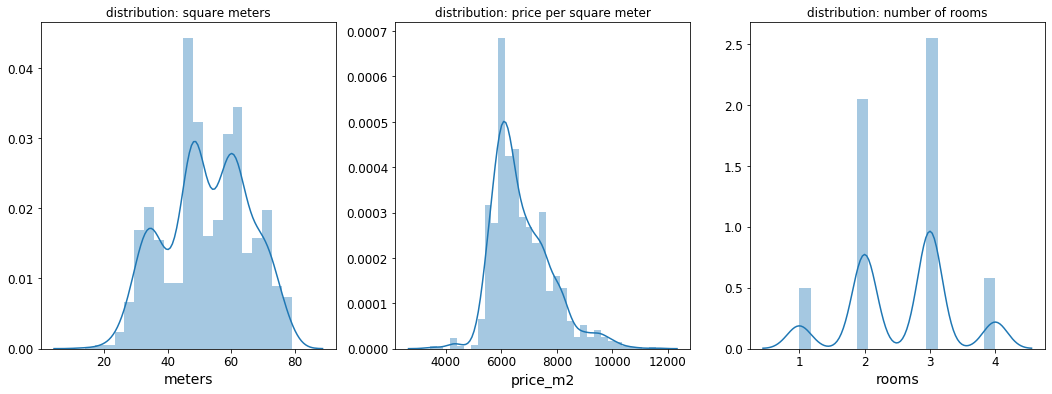

In [30]:
plt.figure()
fig = plt.figure(figsize=(18, 6))
plt.subplot2grid((1, 3), (0, 0))
a1 = sns.distplot(df.meters)
plt.title("distribution: square meters")

plt.subplot2grid((1, 3), (0, 1))
a1 = sns.distplot(df.price_m2)
plt.title('distribution: price per square meter')

plt.subplot2grid((1, 3), (0, 2))
a1 = sns.distplot(df.rooms)
plt.title('distribution: number of rooms')
fig.savefig(os.path.join(DIAGRAMS_DATA_DIR, "distributions.png"))

In [31]:
# fig = plt.figure(1)
# for x in [1, 2, 3, 4]:
#     df.meters[df.rooms == x].plot(kind='kde')
# plt.legend(('kawalerka', '2 pokoje', '3 pokoje', '4 pokoje'))
# fig.savefig(os.path.join(DIAGRAMS_DATA_DIR, "area_divided_into_rooms_distribution.png"))

In [32]:
# fig = plt.figure(2)
# for x in [1, 2, 3, 4]:
#     df.price_m2[df.rooms == x].plot(kind='kde')
# plt.legend(('kawalerka', '2 pokoje', '3 pokoje', '4 pokoje'))
# fig.savefig(os.path.join(DIAGRAMS_DATA_DIR, "price_m2_divided_into_rooms_distribution.png"))

<Figure size 432x288 with 0 Axes>

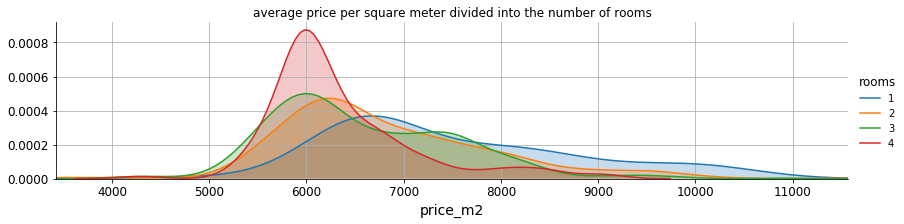

In [58]:
facet = plt.figure(2)
facet = sns.FacetGrid(df, hue="rooms",aspect=4)
facet.map(sns.kdeplot,'price_m2',shade= True)
facet.set(xlim=(0, df['price_m2'].max()))
facet.add_legend()
plt.title('average price per square meter divided into the number of rooms')
plt.grid()
plt.xlim(df.price_m2.min(), df.price_m2.max())
facet.savefig(os.path.join(DIAGRAMS_DATA_DIR, "rooms_price_m2.png"))

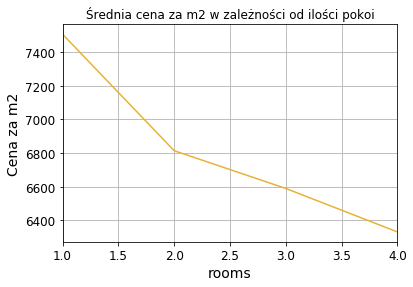

In [34]:
# fig = plt.figure(3)
# plt.title("Średnia cena za m2 w zależności od ilości pokoi")
# plt.grid()
# plt.ylabel("Cena za m2")
# df["price_m2"].groupby(df["rooms"]).agg(np.mean).plot(color = (0.9,0.7,0.2))
# plt.grid(True)
# fig.savefig(os.path.join(DIAGRAMS_DATA_DIR, "avg_price_m2_rooms.png"))

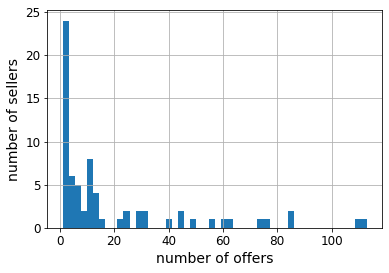

In [59]:
fig = plt.figure(4)
df["dealer"].value_counts().hist(bins=50)
plt.ylabel("number of sellers")
plt.xlabel("number of offers")
fig.savefig(os.path.join(DIAGRAMS_DATA_DIR, "sellers_offers.png"))

<Figure size 432x288 with 0 Axes>

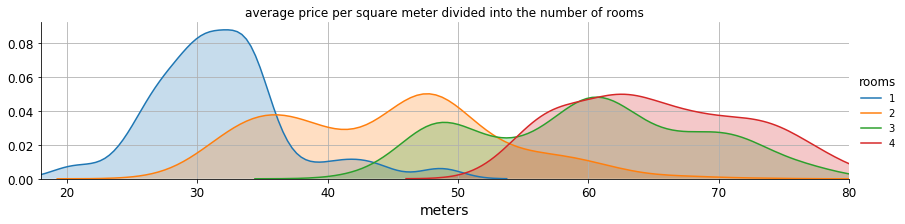

In [60]:
facet = plt.figure(5)
facet = sns.FacetGrid(df, hue="rooms",aspect=4)
facet.map(sns.kdeplot,'meters',shade= True)
facet.set(xlim=(18, df['meters'].max()))
plt.grid()
facet.add_legend()
plt.xlim(18, 80)
plt.title('average number of meters divided into the number of rooms')
facet.savefig(os.path.join(DIAGRAMS_DATA_DIR, "meters_rooms.png"))

<Figure size 432x288 with 0 Axes>

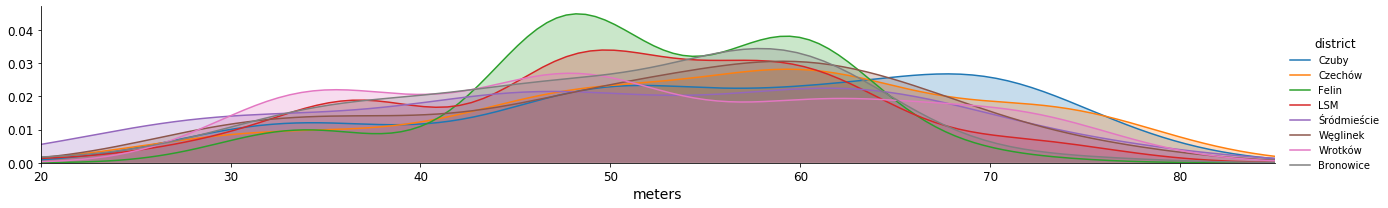

In [66]:
# facet = plt.figure(5)
# facet = sns.FacetGrid(df, hue="district",aspect=6)
# facet.map(sns.kdeplot,'meters',shade= True)
# facet.set(xlim=(0, df['meters'].max()))
# facet.add_legend()
# plt.xlim(20, 85)
# facet.savefig(os.path.join(DATA_DIR, "district_meters.png"))

<Figure size 432x288 with 0 Axes>

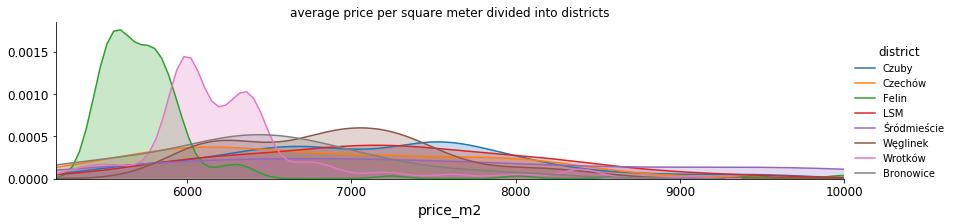

In [63]:
facet = plt.figure(6)
facet = sns.FacetGrid(df, hue="district",aspect=4)
facet.map(sns.kdeplot,'price_m2',shade= True)
facet.set(xlim=(0, df['price_m2'].max()))
facet.add_legend()
plt.title('average price per square meter divided into districts')
plt.xlim(5200, 10000)
facet.savefig(os.path.join(DIAGRAMS_DATA_DIR, "price_m2_district.png"))

<Figure size 432x288 with 0 Axes>

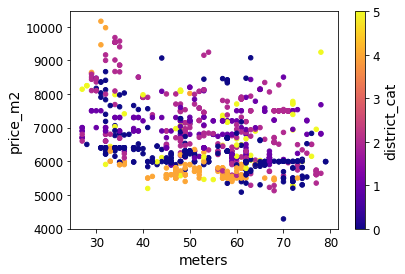

In [67]:
df["district_cat"] = df["district"]
title_mapping = {"Wrotków": 0, "Węglinek": 1, "Czuby": 2, "Felin": 4, "Czechów": 5}
for data in [df]:
    data['district_cat'] = data['district_cat'].map(title_mapping)
fig = plt.figure(7)
df.plot(kind="scatter", x="meters", y="price_m2", alpha=1,
       c="district_cat", cmap=plt.get_cmap("plasma"), colorbar=True,  sharex=False)
fig.savefig(os.path.join(DIAGRAMS_DATA_DIR, "scatter.pdf"), bbox_inches='tight')